In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Sample retail sales data

In [3]:
data = {
    'Product ID': [101, 102, 103, 104, 105, 106, 107, 108],
    'Category': ['Electronics', 'Furniture', 'Electronics', 'Clothing', 'Furniture', 'Clothing', 'Electronics', 'Furniture'],
    'Region': ['North', 'East', 'West', 'South', 'North', 'West', 'East', 'South'],
    'Promotion': ['Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes'],
    'Sales': ['High', 'Low', 'High', 'High', 'Low', 'Low', 'High', 'High']
}

# Convert the data into a pandas DataFrame

In [4]:
df = pd.DataFrame(data)

# Encode categorical variables (Category, Region, Promotion, and Sales)

In [5]:
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Region'] = label_encoder.fit_transform(df['Region'])
df['Promotion'] = label_encoder.fit_transform(df['Promotion'])
df['Sales'] = label_encoder.fit_transform(df['Sales'])  # Target variable (Sales as High-1, Low-0)


# Feature selection: Independent variables (X) and target variable (y)

In [6]:
X = df[['Category', 'Region', 'Promotion']]  # Features
y = df['Sales']  # Target

# Split the data into training and testing sets (80% train, 20% test)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier

In [8]:
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data

In [9]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Make predictions on the test set

In [10]:
y_pred = model.predict(X_test)

# Evaluate the model

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


# Confusion Matrix

In [12]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[2]]


# Classification Report

In [13]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



# Visualizing the decision tree (Optional)

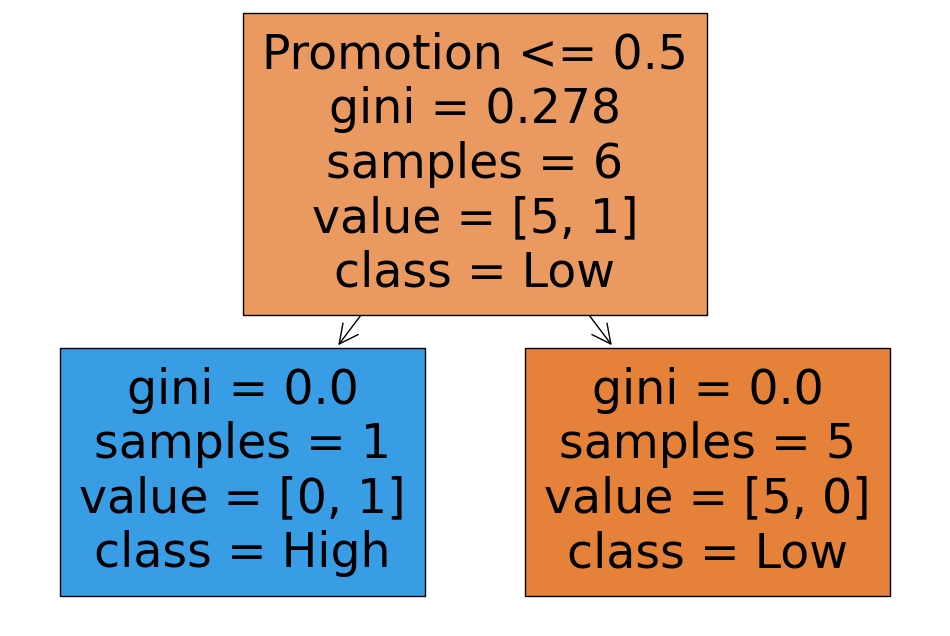

In [19]:
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=['Category', 'Region', 'Promotion'], class_names=['Low', 'High'], filled=True)
plt.show()